# 데이터 다운로드

In [3]:
# 데이터 다운로드
w = !wget https://github.com/makaishi2/pythonlibs/raw/main/images/dog_wolf.zip
print(w[-2])

# 압축 해제
!unzip dog_wolf.zip | tail -n 1

# 트리 구조 확인
!tree dog_wolf

2025-03-22 02:28:32 (370 MB/s) - ‘dog_wolf.zip.1’ saved [21811374/21811374]
replace dog_wolf/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
dog_wolf
├── test
│   ├── dog
│   │   ├── dog-21.png
│   │   ├── dog-22.png
│   │   ├── dog-23.png
│   │   ├── dog-24.png
│   │   └── dog-25.png
│   └── wolf
│       ├── wolf-21.png
│       ├── wolf-22.png
│       ├── wolf-23.png
│       ├── wolf-24.png
│       └── wolf-25.png
└── train
    ├── dog
    │   ├── dog-01.png
    │   ├── dog-02.png
    │   ├── dog-03.png
    │   ├── dog-04.png
    │   ├── dog-05.png
    │   ├── dog-06.png
    │   ├── dog-07.png
    │   ├── dog-08.png
    │   ├── dog-09.png
    │   ├── dog-10.png
    │   ├── dog-11.png
    │   ├── dog-12.png
    │   ├── dog-13.png
    │   ├── dog-14.png
    │   ├── dog-15.png
    │   ├── dog-16.png
    │   ├── dog-17.png
    │   ├── dog-18.png
    │   ├── dog-19.png
    │   └── dog-20.png
    └── wolf
        ├── wolf-01.png
        ├── wolf-02.png
        ├── wolf-03.png
        ├─

In [4]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
w = !apt install tree
print(w[-2])

tree is already the newest version (2.0.2-1).


In [5]:
# 파이토치 관련 라이브러리

import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

In [6]:
# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [7]:
# 공통 함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# 공통 함수 불러오기
from pythonlibs.torch_lib1 import *

# 공통 함수 확인
print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.
Common Library for PyTorch
Author: M. Akaishi


# Transforms 정의

In [8]:
# 검증 데이터 : 정규화
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# 훈련 데이터 : 정규화에 반전 RandomErasing 추가
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

# 데이터셋 정의

In [9]:
data_dir = 'dog_wolf'

import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

classes = ['dog', 'wolf']

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# 데이터로더 정의

In [10]:
batch_size = 5

# 훈련데이터
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
# 훈련데이터, 이미지 출력용
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
# 검증데이터
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
# 검증데이터, 이미지 출력용
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

# 훈련,검증 데이터 이미지 출력

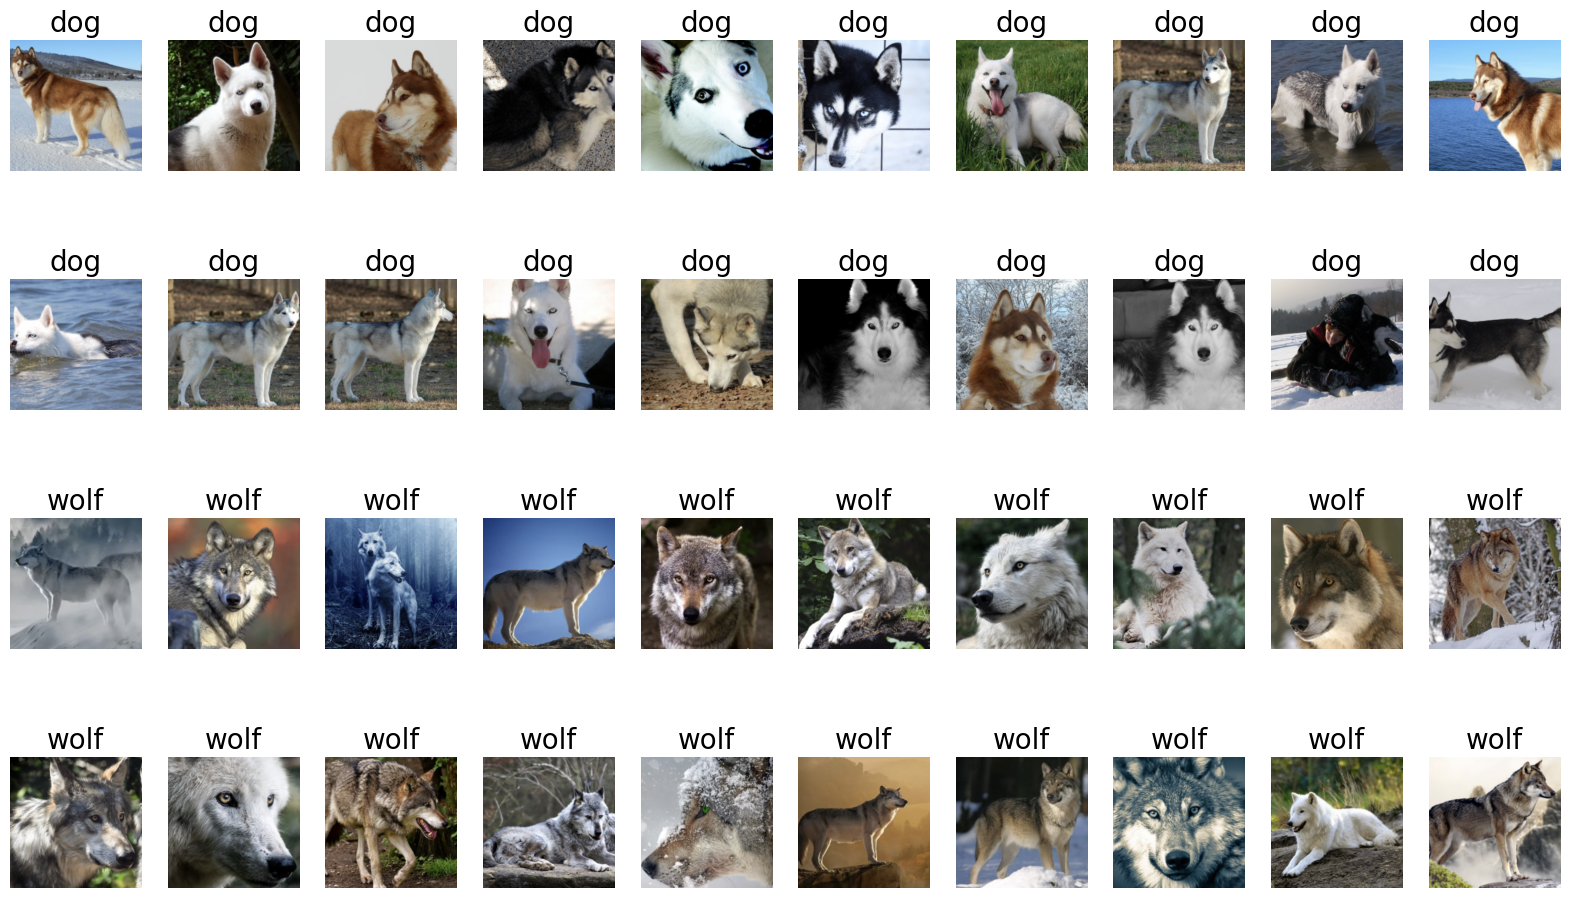

In [11]:
show_images_labels(train_loader2, classes, None, None)

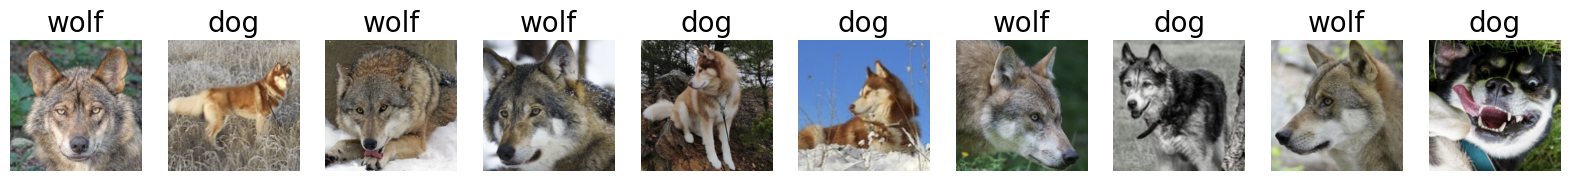

In [12]:
torch_seed()

show_images_labels(test_loader2, classes, None, None)

# 모델 정의

In [13]:
from torchvision import models
import numpy as np

net = models.vgg19_bn(pretrained = True)

for param in net.parameters():
  param.requires_grad = False

# 난수 고정
torch_seed()

# 마지막 노드 출력을 2로 변경
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

# AdaptiveAvgPool2d 함수 제거
net.avgpool = nn.Identity()

# GPU 사용
net = net.to(device)

# 학습률
lr = 0.001

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 최적화 함수 정의
# 파라미터 수정 대상을 최종 노드로 제한
optimizer = optim.SGD(net.classifier[6].parameters(), lr=lr, momentum=0.9)

# history 파일도 동시에 초기화
history = np.zeros((0, 5))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
num_epochs = 10
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.12345 acc: 0.65000 val_loss: 0.07783, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.07584 acc: 0.85000 val_loss: 0.04895, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.03976 acc: 0.92500 val_loss: 0.05762, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.04213 acc: 0.92500 val_loss: 0.03992, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.01836 acc: 0.97500 val_loss: 0.02970, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.02144 acc: 0.97500 val_loss: 0.04182, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.03019 acc: 0.95000 val_loss: 0.03631, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.04319 acc: 0.92500 val_loss: 0.03186, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.01086 acc: 1.00000 val_loss: 0.02766, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.04419 acc: 0.92500 val_loss: 0.03189, val_acc: 1.00000


# 예측 결과

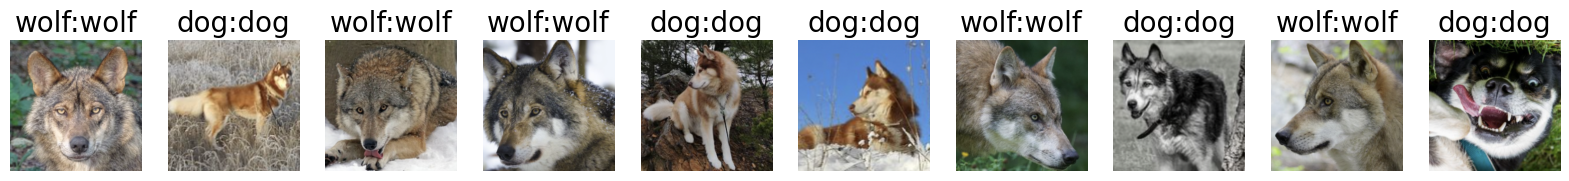

In [16]:
# 예측 결과 출력
torch_seed()
show_images_labels(test_loader2, classes, net, device)